# *O ProAssist AI: Especialistas Virtuais*

O projeto pretende ser viabilizar um assistente virtual avançado projetado para apoiar a execução de tarefas técnicas, com foco inicial na manutenção de máquinas industriais. A solução visa permitir que operadores identifiquem rapidamente equipamentos por meio de QR Codes, acessando informações operacionais em tempo real, como temperatura, vibração e consumo energético. A interface de conversação multimodal está planejada para facilitar a interação via voz ou imagens, proporcionando orientações detalhadas para diagnósticos e reparos.

Os benefícios esperados incluem a redução do tempo de inatividade, suporte a novos profissionais, melhoria contínua através da coleta de feedback e escalabilidade para diferentes setores e tipos de máquinas.

Com futuras expansões, o ProAssist AI pretende se consolidar como uma ferramenta essencial para profissionais que buscam otimizar seu trabalho e minimizar erros operacionais. Além disso, a arquitetura e abordagem adotadas permitirão que o ProAssist AI seja adaptado para outras áreas, como suporte técnico em TI, manutenção de equipamentos médicos, inspeções de segurança ou consultoria em processos agrícolas.

Motivador:

https://www.youtube.com/watch?v=oZOcn8RFLks&list=LL&index=11


# Código oculto

In [1]:
# Instalar e importar as bibliotecas
!pip install --upgrade --upgrade-strategy eager "regex" "charset-normalizer<4" "idna" "urllib3<3" "certifi" "requests" "anyio<5" "distro<2" "sniffio" "h11<0.15" "httpcore==1.*" "annotated-types" "typing-extensions<5" "pydantic-core==2.27.1" "pydantic<3" "jiter<1" "tqdm" "colorama" "openai" "tiktoken" "httpx<0.28"
!pip install openai

import base64
from openai import OpenAI
from IPython.display import display, Image
from PIL import Image as PILImage
import io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.6
    Uninstalling tqdm-4.66.6:
      Successfully uninstalled tqdm-4.66.6
  Attempting uninstall: regex
    Found existing installation: regex 2024.9.11
    Uninstalling regex-2024.9.11:
      Successfully uninstalled regex-2024.9.11
  Attempting uninstall: anyio
    Found existing installatio

In [29]:
# Função para codificar a imagem em base64
def encode_image(image_path: str) -> str:
    """
    Lê uma imagem local e retorna uma string base64 da imagem.
    """
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# Função para decodificar e exibir a imagem
def display_image(base64_str: str) -> None:
    """
    Decodifica uma imagem a partir de uma string base64 e a exibe no notebook.
    """
    image_data = base64.b64decode(base64_str)
    image = PILImage.open(io.BytesIO(image_data))
    display(image)

# Função para enviar mensagens ao modelo e receber respostas
def send_message(model: str, messages: list) -> str:
    """
    Envia uma lista de mensagens para o modelo e retorna a resposta.
    """
    response = client.chat.completions.create(
        model=model,
        messages=messages,
    )
    return response.choices[0].message.content

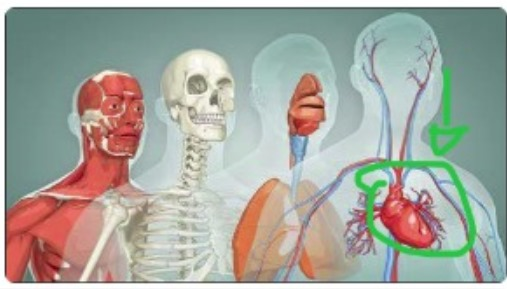

In [ ]:
# Inicializar o cliente OpenAI
client = OpenAI(api_key = "")

# Caminho para a imagem
image_path = "/content/drive/MyDrive/Faculdade/LIA1-VisaoComputacional/image.jpg"

# Codifica a imagem em base64
base64_image = encode_image(image_path)

# Exibe a imagem no notebook
display_image(base64_image)

# DIALOGO INICIAL

In [36]:
# Inicializar o histórico de mensagens com a instrução inicial
messages = [
    {"role": "system", "content": "Por favor, forneça apenas respostas curtas, que não passe de 300 caracteres."},
    {"role": "user", "content":[{"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}}]}
]

# Define o modelo a ser utilizado
modelo = "gpt-4o-mini"

print("Início do diálogo. Faça suas perguntas sobre a imagem. Digite 'encerrar' para sair.")

while True:
    # Solicita uma nova pergunta do usuário
    user_input = input("\nDigite sua pergunta (ou 'encerrar' para sair): ").strip()

    if user_input.lower() == "encerrar":
        print("Diálogo encerrado.")
        break

    # Adicionar a pergunta do usuário
    messages.append({
        "role": "user",
        "content": [{"type": "text", "text": user_input}]
    })

    # Enviar a mensagem ao modelo
    resposta = send_message(model=modelo, messages=messages)

    # Imprimir a resposta do assistente
    print("\nResposta do assistente:")
    print(resposta)

    # Adicionar a resposta do assistente ao histórico
    messages.append({
        "role": "assistant",
        "content": [{"type": "text", "text": resposta}]
    })

Início do diálogo. Faça suas perguntas sobre a imagem. Digite 'encerrar' para sair.

Digite sua pergunta (ou 'encerrar' para sair): O que voce ve na imagem?

Resposta do assistente:
A imagem mostra uma representação anatômica do corpo humano, destacando o esqueleto, músculos e órgãos. O coração é circunscrito em verde, indicando sua localização dentro do sistema circulatório.

Digite sua pergunta (ou 'encerrar' para sair): me fala mais sobre o orgão circunscrito em verde

Resposta do assistente:
O órgão circunscrito em verde é o coração, responsável por bombear sangue por todo o corpo. Ele é composto de quatro câmaras: dois átrios e dois ventrículos. O coração também regula o fluxo sanguíneo e mantém a pressão arterial, sendo vital para a circulação e o transporte de nutrientes e oxigênio.

Digite sua pergunta (ou 'encerrar' para sair): encerrar
Diálogo encerrado.


# TESTANDO PARTE DO QRCODE

In [15]:
!pip install qrcode[pil]
!pip install pillow
!pip install pyzbar

In [12]:
import qrcode
import json
from PIL import Image

# Dados dos equipamentos
equipamento1 = {
    "nome": "Máquina A",
    "temperatura": "75°C",
    "vibração": "1.2 mm/s",
    "consumo_energia": "1500 kWh",
    "status": "Operando normalmente"
}

equipamento2 = {
    "nome": "Máquina B",
    "temperatura": "90°C",
    "vibração": "2.5 mm/s",
    "consumo_energia": "2000 kWh",
    "status": "Anomalia detectada"
}

# Função para gerar QR Code
def gerar_qr_code(dados, nome_arquivo):
    # Convertendo o dicionário para uma string JSON
    dados_json = json.dumps(dados, ensure_ascii=False)

    # Criando o QR Code
    qr = qrcode.QRCode(
        version=1,  # Controle o tamanho do QR Code
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    qr.add_data(dados_json)
    qr.make(fit=True)

    # Gerando a imagem
    img = qr.make_image(fill_color="black", back_color="white")

    # Salvando a imagem
    img.save(nome_arquivo)
    print(f"QR Code salvo como {nome_arquivo}")
    return img  # Retorna a imagem para exibição

# Gerando QR Codes para os dois equipamentos
img1 = gerar_qr_code(equipamento1, "equipamento1_qrcode.png")
img2 = gerar_qr_code(equipamento2, "equipamento2_qrcode.png")

QR Code salvo como equipamento1_qrcode.png
QR Code salvo como equipamento2_qrcode.png


Exibindo QR Code para o equipamento 1:


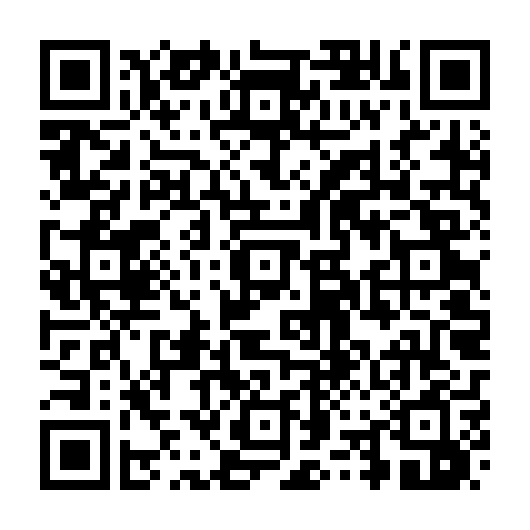

In [13]:
# Exibindo o QR Code
print("Exibindo QR Code para o equipamento 1:")
display(img1)

Exibindo QR Code para o equipamento 2:


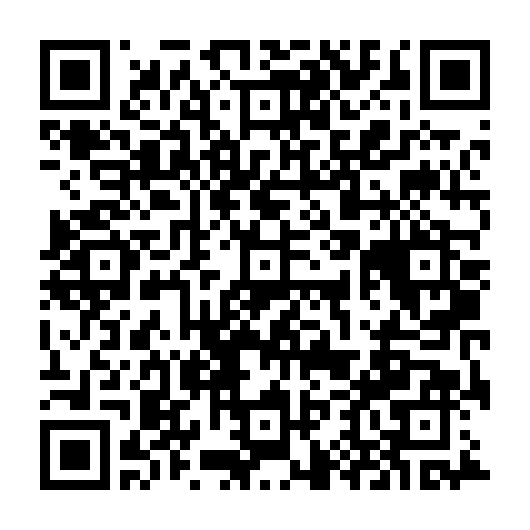

In [17]:
# Exibindo o QR Code
print("Exibindo QR Code para o equipamento 2:")
display(img2)